# NYC Property Sales

## Introduction

## Reading the Data

In [2]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

In [3]:
df_sales = pd.read_csv('E:\Cool Yeah\Hacktiv8\Property Sales\Data\sales.csv')

In [24]:
df_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df_sales.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [6]:
df_sales.shape

(84548, 22)

## Data Cleanup

In [5]:
clean_df = df_sales.drop(['Unnamed: 0', 'LOT', 'EASE-MENT','APARTMENT NUMBER', 'ADDRESS','ZIP CODE'], axis=1)

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   BUILDING CLASS AT PRESENT       84548 non-null  object
 6   RESIDENTIAL UNITS               84548 non-null  int64 
 7   COMMERCIAL UNITS                84548 non-null  int64 
 8   TOTAL UNITS                     84548 non-null  int64 
 9   LAND SQUARE FEET                84548 non-null  object
 10  GROSS SQUARE FEET               84548 non-null  object
 11  YEAR BUILT                      84548 non-null  int64 
 12  TAX CLASS AT TIME OF SALE       84548 non-null

In [7]:
sum(clean_df.duplicated())

2751

In [8]:
clean_df = clean_df.drop_duplicates()
sum(clean_df.duplicated())

0

In [9]:
clean_df.replace(' -  ', 0, inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [10]:
clean_df.replace(np.nan, 0, inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [11]:
clean_df['BOROUGH_NAME'] = clean_df['BOROUGH'].astype(str)
clean_df['BOROUGH_NAME'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,Staten Island
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,Staten Island
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,Staten Island
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,Staten Island


In [12]:
clean_df['SALE_PRICE_IN_M'] = clean_df['SALE PRICE'].astype(np.float64) / 1000000
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_PRICE_IN_M
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan,6.625000
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,Manhattan,0.000000
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,Manhattan,0.000000
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan,3.936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,Staten Island,0.450000
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,Staten Island,0.550000
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,Staten Island,0.460000
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,Staten Island,11.693337


In [13]:
clean_df['YEAR_BUILT'] = clean_df['YEAR BUILT'].astype(np.float64)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_PRICE_IN_M,YEAR_BUILT
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan,6.625000,1900.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,Manhattan,0.000000,1900.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,Manhattan,0.000000,1900.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan,3.936272,1913.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan,8.000000,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,Staten Island,0.450000,1998.0
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,Staten Island,0.550000,1998.0
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,Staten Island,0.460000,1925.0
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,Staten Island,11.693337,2001.0


In [14]:
clean_df['SALE DATE'] = pd.to_datetime(clean_df['SALE DATE'])
clean_df['SALE_MONTH']= clean_df['SALE DATE'].dt.month

clean_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_PRICE_IN_M,YEAR_BUILT,SALE_MONTH
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19,Manhattan,6.625000,1900.0,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14,Manhattan,0.000000,1900.0,12
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09,Manhattan,0.000000,1900.0,12
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23,Manhattan,3.936272,1913.0,9
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17,Manhattan,8.000000,1900.0,11


In [15]:
clean_df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'BUILDING CLASS AT PRESENT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'BOROUGH_NAME', 'SALE_PRICE_IN_M',
       'YEAR_BUILT', 'SALE_MONTH'],
      dtype='object')

In [16]:
corr = clean_df.corr().abs()
corr

,BOROUGH,BLOCK,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE_PRICE_IN_M,YEAR_BUILT,SALE_MONTH
BOROUGH,1.000000,0.416093,0.021947,0.005504,0.022034,0.105939,0.319801,0.073121,0.105939,0.002988
BLOCK,0.416093,1.000000,0.014941,0.002810,0.014740,0.071475,0.285547,0.056235,0.071475,0.004922
RESIDENTIAL UNITS,0.021947,0.014941,1.000000,0.016785,0.883587,0.024664,0.000698,0.098048,0.024664,0.010534
COMMERCIAL UNITS,0.005504,0.002810,0.016785,1.000000,0.482950,0.006012,0.049692,0.042270,0.006012,0.005029
TOTAL UNITS,0.022034,0.014740,0.883587,0.482950,1.000000,0.023624,0.027739,0.105653,0.023624,0.011682
YEAR BUILT,0.105939,0.071475,0.024664,0.006012,0.023624,1.000000,0.189453,0.002664,1.000000,0.006274
TAX CLASS AT TIME OF SALE,0.319801,0.285547,0.000698,0.049692,0.027739,0.189453,1.000000,0.082740,0.189453,0.015619
SALE_PRICE_IN_M,0.073121,0.056235,0.098048,0.042270,0.105653,0.002664,0.082740,1.000000,0.002664,0.003236
YEAR_BUILT,0.105939,0.071475,0.024664,0.006012,0.023624,1.000000,0.189453,0.002664,1.000000,0.006274
SALE_MONTH,0.002988,0.004922,0.010534,0.005029,0.011682,0.006274,0.015619,0.003236,0.006274,1.000000


In [104]:
import seaborn as sbs

In [106]:
clean_df['SALE_PRICE_IN_M']

0         6.625000
1         0.000000
2         0.000000
3         3.936272
4         8.000000
           ...    
84543     0.450000
84544     0.550000
84545     0.460000
84546    11.693337
84547     0.069300
Name: SALE_PRICE_IN_M, Length: 81797, dtype: float64

Text(0.5, 1.0, "Borough by property's average price (in M)")

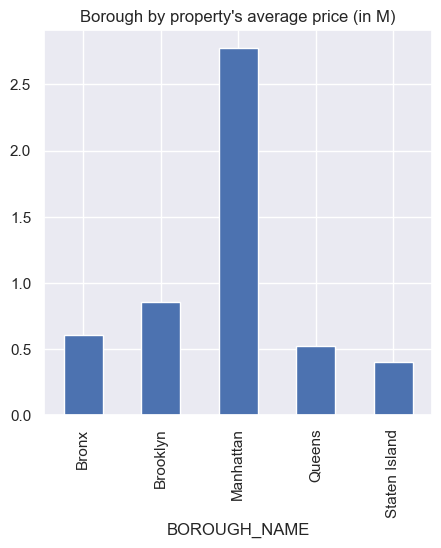

In [107]:
clean_df['SALE_PRICE_IN_M'].groupby(clean_df['BOROUGH_NAME']).mean().plot.bar()
plt.title("Borough by property's average price (in M)")

## Mean

In [34]:
df_sales['SALE PRICE'] = df_sales['SALE PRICE'].replace(' -  ', 'NaN')

In [35]:
df_sales['SALE PRICE'] = df_sales['SALE PRICE'].astype('float')

In [50]:
df_sales[df_sales['SALE PRICE'] == 0].shape

(10228, 22)

In [33]:
arr_price = np.array(df_sales['SALE PRICE'])
arr_price

array([ 6625000.,       nan,       nan, ...,   460000., 11693337.,
          69300.])

In [41]:
arr_price = df_sales['SALE PRICE'].to_numpy()
arr_price

array([ 6625000.,       nan,       nan, ...,   460000., 11693337.,
          69300.])

### pandas

In [39]:
df_sales['SALE PRICE'].mean()

1276456.4977638705

### numpy

In [69]:
mean = np.nanmean(arr_price)
mean

1276456.4977638705

### scipy

In [70]:
scipy.nanmean(arr_price)

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_3760\3012418174.py:1: DeprecationWarning: scipy.nanmean is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmean instead
  scipy.nanmean(arr_price)


1276456.4977638705

## Median

### pandas

In [51]:
median = df_sales['SALE PRICE'].median()
median

530000.0

### numpy

In [73]:
median = np.nanmedian(arr_price)
median

530000.0

## Modus

### pandas

In [45]:
mode = df_sales['SALE PRICE'].mode()
mode

0    0.0
Name: SALE PRICE, dtype: float64

### scipy

In [52]:
mode = scipy.stats.mode(arr_price, nan_policy='omit')
mode

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_10892\900576114.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = scipy.stats.mode(arr_price, nan_policy='omit')


ModeResult(mode=array([0.]), count=array([10228.]))

In [53]:
print(mode.mode)
print(mode.count)

[0.]
[10228.]


## Range

In [54]:
df_sales['SALE PRICE'].max() - df_sales['SALE PRICE'].min()

2210000000.0

## Variance

In [55]:
df_sales['SALE PRICE'].var(skipna=True, ddof=1)

130079849507240.9

In [23]:
var = np.nanvar(arr_price, ddof=1)
var

130079849507172.67

## Standard Deviation

In [29]:
std = np.nanstd(arr_price, ddof=1)
std

11405255.345987335

In [56]:
std = df_sales['SALE PRICE'].std(ddof=1)
std

11405255.345990326

## Probability Distribution

In [58]:
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

In [59]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

### Probability Distribution

In [114]:
clean_df['SALE_PRICE_IN_M'].groupby(clean_df['YEAR_BUILT']).mean()

YEAR_BUILT
0.0       1.197668
1111.0    8.208750
1680.0    0.000000
1800.0    1.105059
1826.0    0.000000
            ...   
2013.0    2.908933
2014.0    2.167645
2015.0    1.367528
2016.0    0.840816
2017.0    0.145000
Name: SALE_PRICE_IN_M, Length: 158, dtype: float64

In [22]:
sale_price = clean_df['SALE_PRICE_IN_M'].groupby(clean_df['YEAR_BUILT']).mean()

In [23]:
sale_price

YEAR_BUILT
0.0       1.197668
1111.0    8.208750
1680.0    0.000000
1800.0    1.105059
1826.0    0.000000
            ...   
2013.0    2.908933
2014.0    2.167645
2015.0    1.367528
2016.0    0.840816
2017.0    0.145000
Name: SALE_PRICE_IN_M, Length: 158, dtype: float64

D:\Application\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of sale price in M by year built')

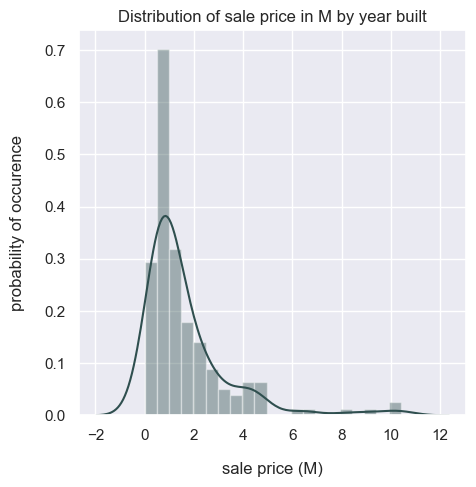

In [134]:
sns.distplot(
    sale_price, 
    color='darkslategrey'
)

plt.xlabel('sale price (M)', labelpad=14)
plt.ylabel('probability of occurence', labelpad=14)
plt.title('Distribution of sale price in M by year built')

In [135]:
mean = np.mean(sale_price)
mean

1.6621207264351896

In [136]:
median = np.median(sale_price)
median

0.9968778756476684

In [143]:
mode = sale_price.mode()
mode

0    0.0
Name: SALE_PRICE_IN_M, dtype: float64

In [147]:
range = sale_price.max() - sale_price.min()
range

10.403663357142856

In [144]:
var = np.var(sale_price)
var

3.177710130006125

In [146]:
std = np.std(sale_price)
std

1.7826132867243318

## Confidence Intervals

In [17]:
clean_df.describe()

,BOROUGH,BLOCK,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE_PRICE_IN_M,YEAR_BUILT,SALE_MONTH
count,81797.000000,81797.000000,81797.000000,81797.000000,81797.000000,81797.000000,81797.000000,81797.000000,81797.000000,81797.000000
mean,3.010123,4269.917638,1.991650,0.187354,2.202795,1796.291600,1.632688,1.088341,1796.291600,6.558957
std,1.284029,3569.938561,16.235172,8.679970,18.535453,525.699216,0.794292,10.554183,525.699216,3.466710
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,1334.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,0.000000,1920.000000,4.000000
50%,3.000000,3347.000000,1.000000,0.000000,1.000000,1939.000000,1.000000,0.432000,1939.000000,6.000000
75%,4.000000,6333.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,0.850000,1965.000000,10.000000
max,5.000000,16322.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2210.000000,2017.000000,12.000000
